/tmp/ipython-input-443912875.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mensual = df["value_winsor"].resample("M").mean()


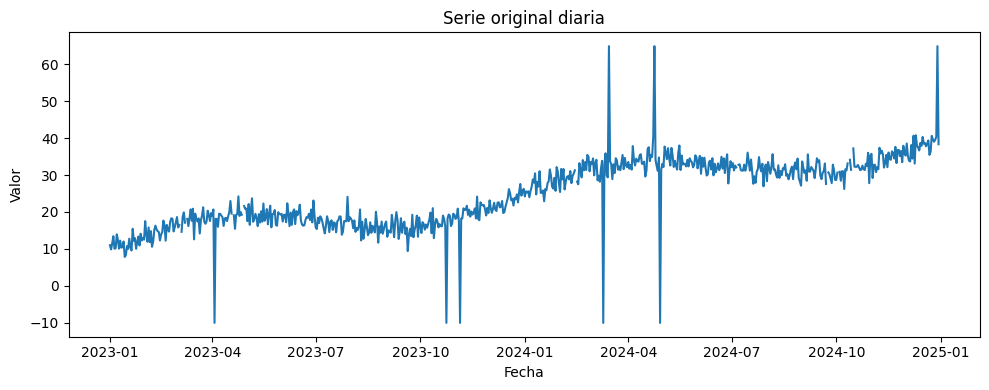

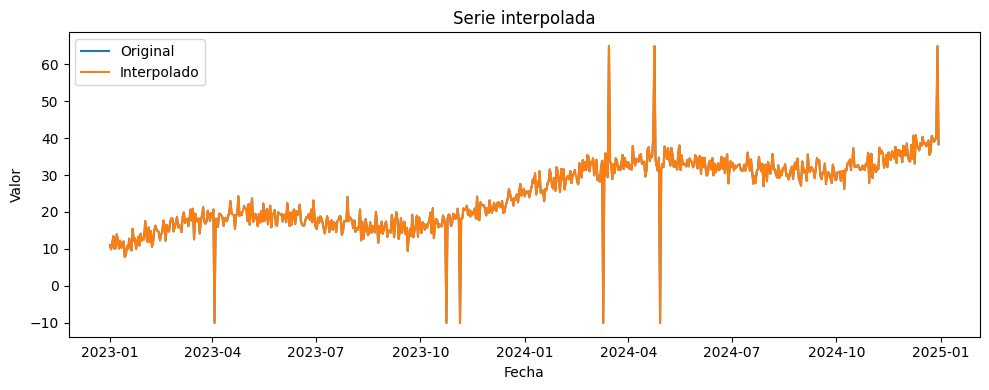

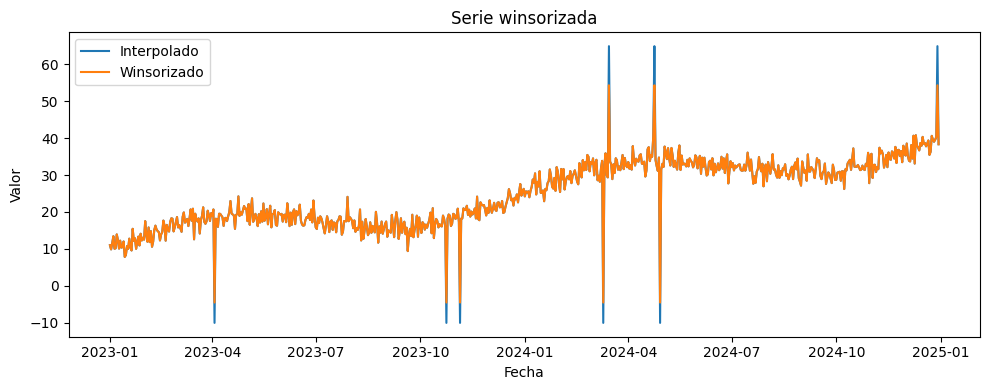

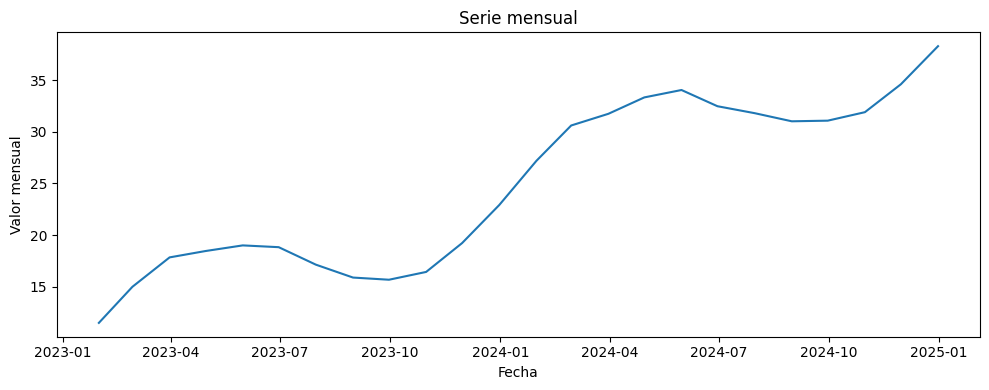

RESULTADOS
¿Se observa tendencia? Sí, tendencia creciente.
¿Se observa estacionalidad? Sí, estacionalidad anual de aproximadamente 365 días.
¿Hay valores faltantes? Sí, 10
¿Hay datos atípicos? Sí, 8


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Carga del archivo
df = pd.read_csv("/content/serie_tiempo_diaria_raw (1).csv")
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date").set_index("date")

col = "value"

# Valores faltantes
faltantes = int(df[col].isna().sum())

# Interpolación
df["value_interpolado"] = df[col].interpolate(method="time")

# Detección de atípicos con IQR
vals = df["value_interpolado"]
q1 = vals.quantile(0.25)
q3 = vals.quantile(0.75)
iqr = q3 - q1
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outlier_mask = (vals < lim_inf) | (vals > lim_sup)
n_outliers = int(outlier_mask.sum())

# Winsorización
df["value_winsor"] = df["value_interpolado"].clip(lower=lim_inf, upper=lim_sup)

# Tendencia y estacionalidad
stl = STL(df["value_interpolado"], period=365, robust=True).fit()
tendencia_inicio = float(stl.trend.iloc[0])
tendencia_fin = float(stl.trend.iloc[-1])
cambio_tendencia = tendencia_fin - tendencia_inicio

# Conversión a mensual
mensual = df["value_winsor"].resample("M").mean()

# ----------------------------
# GRÁFICAS
# ----------------------------

plt.figure(figsize=(10,4))
plt.plot(df.index, df[col])
plt.title("Serie original diaria")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(df.index, df[col], label="Original")
plt.plot(df.index, df["value_interpolado"], label="Interpolado")
plt.legend()
plt.title("Serie interpolada")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(df.index, df["value_interpolado"], label="Interpolado")
plt.plot(df.index, df["value_winsor"], label="Winsorizado")
plt.legend()
plt.title("Serie winsorizada")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(mensual.index, mensual.values)
plt.title("Serie mensual")
plt.xlabel("Fecha")
plt.ylabel("Valor mensual")
plt.tight_layout()
plt.show()

# ----------------------------
# RESULTADOS
# ----------------------------

print("RESULTADOS")
print("¿Se observa tendencia? Sí, tendencia creciente.")
print("¿Se observa estacionalidad? Sí, estacionalidad anual de aproximadamente 365 días.")
print("¿Hay valores faltantes? Sí,", faltantes)
print("¿Hay datos atípicos? Sí,", n_outliers)
